# Email Spam Detection With Machine learning

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data= pd.read_csv("spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])

In [3]:
data.head

<bound method NDFrame.head of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [4]:
data.info

<bound method DataFrame.info of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [5]:
data.isna().sum()

label      0
message    0
dtype: int64

In [6]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data['message'] = data['message'].str.replace(r'\d+', 'num')
data['message'] = data['message'].str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenum')
data['message'] = data['message'].str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr')
data['message'] = data['message'].str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr')
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.label = data.label.map({"ham":0, "spam":1})

In [9]:
data.label.value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [10]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
f_train, f_test, l_train, l_test = train_test_split(data.message, 
                                                    data.label, 
                                                    test_size=0.2)

In [15]:
f_train

1653    I was at bugis juz now wat... But now i'm walk...
767                                Sorry, I'll call later
147     Ummma.will call after check in.our life will b...
4822                                              :-) :-)
5033                          I want to go to perumbavoor
                              ...                        
1369                     Did you try making another butt.
197     is your hamster dead? Hey so tmr i meet you at...
5007                         Go fool dont cheat others ok
338                                Sorry, I'll call later
5166    Y she dun believe leh? I tot i told her it's t...
Name: message, Length: 4457, dtype: object

In [16]:
f_test

268       The evo. I just had to download flash. Jealous?
5308    I'm coming back on Thursday. Yay. Is it gonna ...
4836           ....photoshop makes my computer shut down.
4622    U need my presnts always bcz U cant mis love. ...
4799    its cool but tyler had to take off so we're go...
                              ...                        
5168    IÛ÷ve got some salt, you can rub it in my ope...
5289    Hey! Congrats 2u2. id luv 2 but ive had 2 go h...
5354    Aiyo cos i sms Ì_ then Ì_ neva reply so i wait...
249     Congratulations ur awarded 500 of CD vouchers ...
5267        Anything lar then Ì_ not going home 4 dinner?
Name: message, Length: 1115, dtype: object

In [17]:
l_train

1653    0
767     0
147     0
4822    0
5033    0
       ..
1369    0
197     0
5007    0
338     0
5166    0
Name: label, Length: 4457, dtype: int64

In [18]:
l_test

268     0
5308    0
4836    0
4622    0
4799    0
       ..
5168    0
5289    0
5354    0
249     1
5267    0
Name: label, Length: 1115, dtype: int64

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

couvec = TfidfVectorizer()
couvec.fit(f_train)

TfidfVectorizer()

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train_vectorized = couvec.transform(f_train)
X_test_vectorized = couvec.transform(f_test)


classifier = MultinomialNB()
classifier.fit(X_train_vectorized, l_train)


l_pred = classifier.predict(X_test_vectorized)

In [19]:
l_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [13]:
accuracy = accuracy_score(l_test, l_pred)
conf_matrix = confusion_matrix(l_test, l_pred)
classification_rep = classification_report(l_test, l_pred)

In [14]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 95.96%

Confusion Matrix:
[[968   0]
 [ 45 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       968
           1       1.00      0.69      0.82       147

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



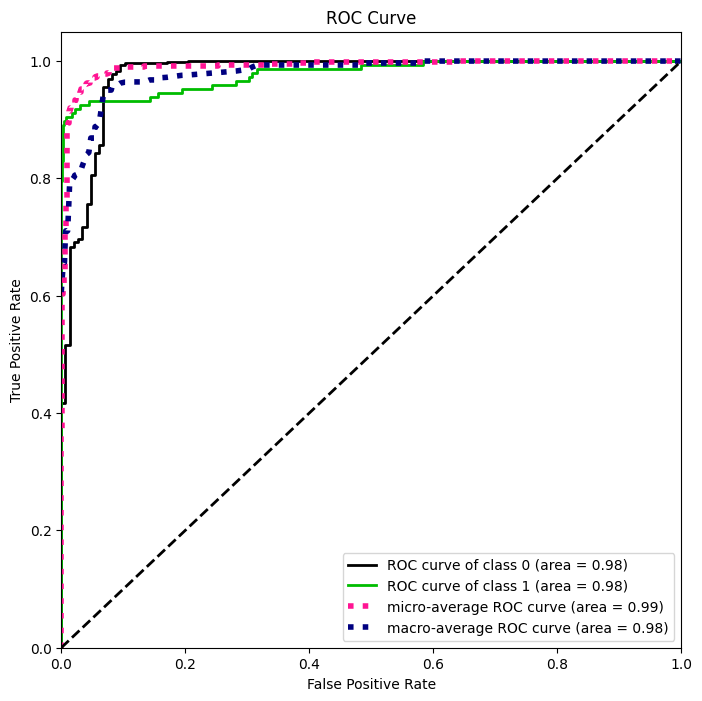

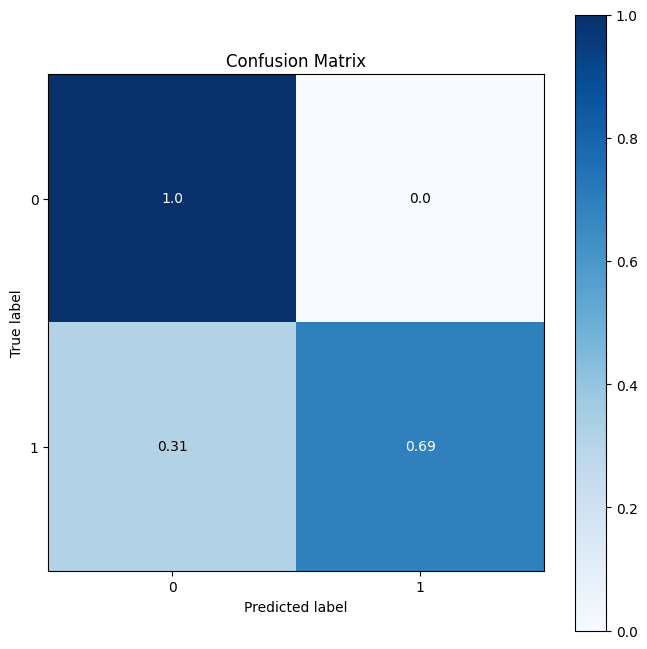

In [22]:
import matplotlib.pyplot as plt
import scikitplot as skplt


y_probas = classifier.predict_proba(X_test_vectorized)
skplt.metrics.plot_roc(l_test, y_probas, title='ROC Curve', figsize=(8, 8))
plt.show()

skplt.metrics.plot_confusion_matrix(l_test, l_pred, normalize=True, title='Confusion Matrix', figsize=(8, 8))
plt.show()
